In [1]:
%matplotlib inline

In [56]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vtk_rw import read_vtk
import seaborn as sns
from plotting import plot_surf_stat_map
import matplotlib

In [63]:
sns.set_context('notebook', font_scale=1.8)

In [3]:
def calculate_normals(vertices, faces):
    
    triangles = vertices[faces]
    face_normals = np.cross( triangles[::,1 ] - triangles[::,0]  , triangles[::,2 ] - triangles[::,0] )
    #face_normals /= np.linalg.norm(face_normals, axis=1)[:,np.newaxis]
    face_normals /= 2 # weighting by surface area of the triangle, which is half the length of the normal
    
    vertex_normals = np.zeros(vertices.shape, dtype=vertices.dtype )
    vertex_normals[faces[:,0]] += face_normals
    vertex_normals[faces[:,1]] += face_normals
    vertex_normals[faces[:,2]] += face_normals
    vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:,np.newaxis]
    
    return vertex_normals

In [4]:
def compare_normals(normals_a, normals_b):
    diff_rad = np.zeros((normals_a.shape[0],))
    for i in range(normals_a.shape[0]):
        diff_rad[i] = np.arccos(np.dot(normals_a[i], normals_b[i]))
    
    diff_deg = diff_rad  * (180/np.pi)
    return diff_rad, diff_deg

### meshes

In [5]:
simple_v, simple_f, _ = read_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/lowres_rh_d_def.vtk')

In [66]:
simple_norms = calculate_normals(simple_v, simple_f)

In [7]:
complex_v, complex_f, _ = read_vtk('/scr/ilz3/myelinconnect/struct/surf_rh/orig/mid_surface/BP4T_rh_mid.vtk')

In [67]:
complex_norms = calculate_normals(complex_v, complex_f)

In [18]:
sulc = np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_sulc.npy')

### mappings

In [10]:
mapping_orig = np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/seeds/BP4T_rh_highres2lowres_seeds.npy')

In [11]:
mapping_tree = np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/seeds_fixed/BP4T_rh_highres2lowres_seeds_test.npy')

In [ ]:
#mapping_ideal = np.load('')

## Normals

### distributions

In [13]:
_, diff_orig = compare_normals(simple_norms, complex_norms[mapping_orig])

In [14]:
_, diff_tree = compare_normals(simple_norms, complex_norms[mapping_tree])

In [ ]:
#_, diff_ideal = compare_normals(simple_norms, complex_norms[mapping_tree])

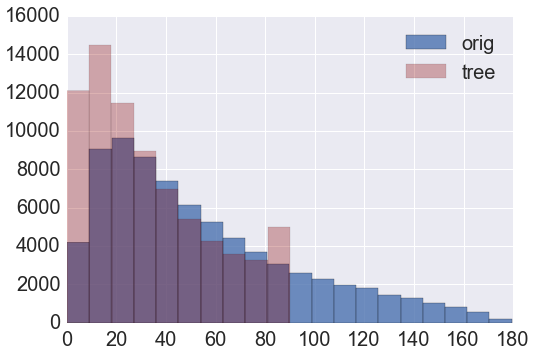

In [58]:
plt.hist(diff_orig, bins=20, alpha=0.8, label='orig');
plt.hist(diff_tree, bins=10, alpha=0.3, color='darkred', label='tree');
plt.legend()

### brains

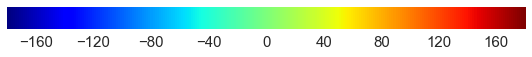

In [62]:
import matplotlib
sns.set_style('darkgrid')
norm = matplotlib.colors.Normalize(vmin=-180, vmax=180)
fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=plt.get_cmap('jet'),norm=norm,orientation='horizontal')

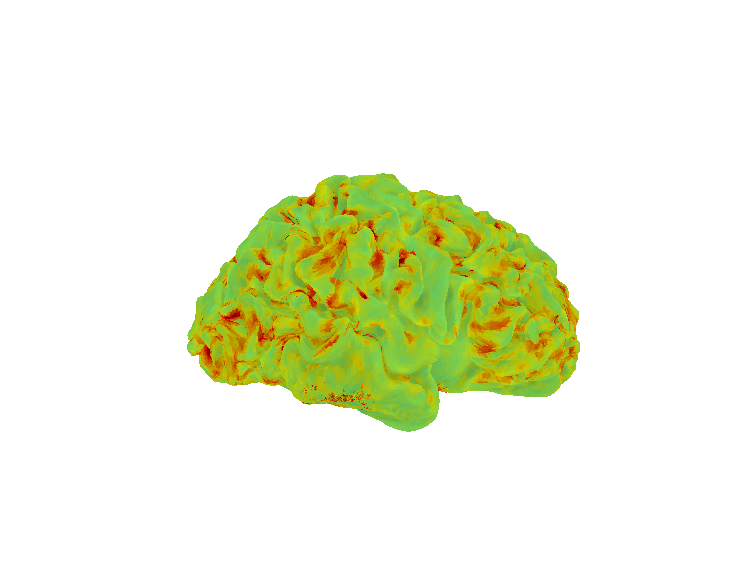

In [33]:
sns.set_style('white')
plot_orig = plot_surf_stat_map(simple_v, simple_f, stat_map=diff_orig, bg_map=sulc, bg_on_stat=True, 
                               darkness=0.6,cmap='jet',elev=180,azim=0, figsize=(13,10), vmax=180)

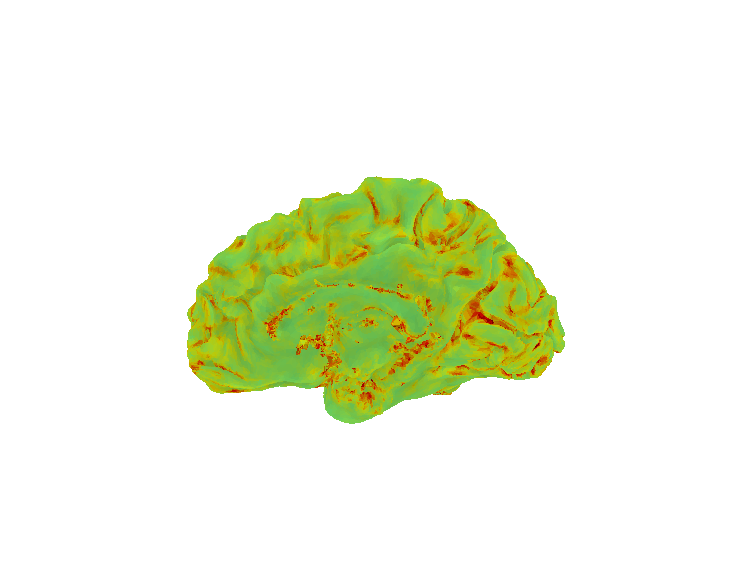

In [36]:
sns.set_style('white')
plot_orig = plot_surf_stat_map(simple_v, simple_f, stat_map=diff_orig, bg_map=sulc, bg_on_stat=True, 
                               darkness=0.6,cmap='jet',elev=180,azim=180, figsize=(13,10), vmax=180)

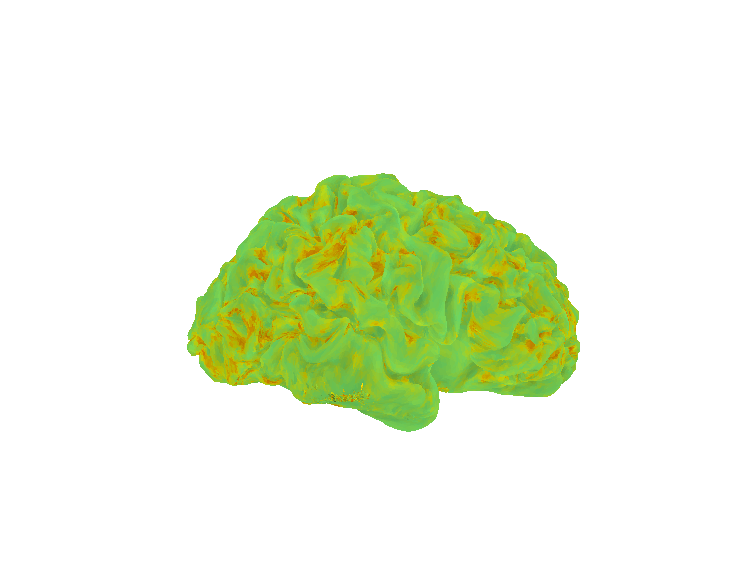

In [40]:
sns.set_style('white')
plot_orig = plot_surf_stat_map(simple_v, simple_f, stat_map=diff_tree, bg_map=sulc, bg_on_stat=True, 
                               darkness=0.6,cmap='jet',elev=180,azim=0, figsize=(13,10), vmax=180)

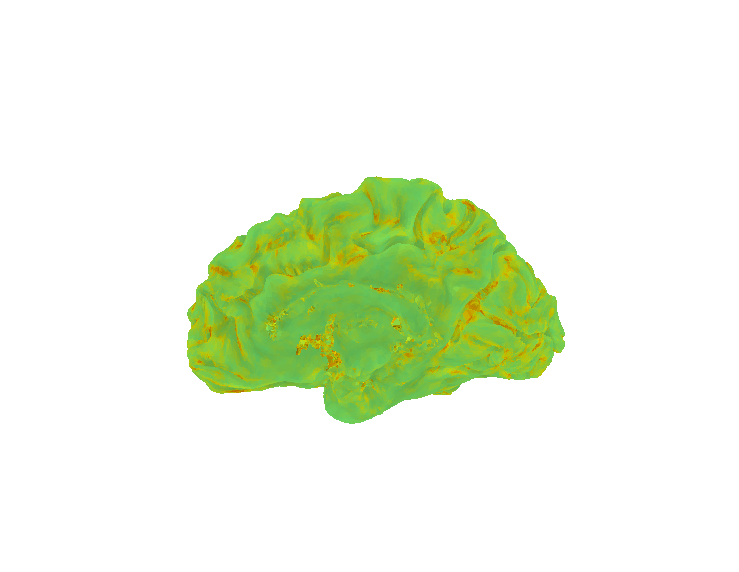

In [37]:
sns.set_style('white')
plot_orig = plot_surf_stat_map(simple_v, simple_f, stat_map=diff_tree, bg_map=sulc, bg_on_stat=True, 
                               darkness=0.6,cmap='jet',elev=180,azim=180, figsize=(13,10), vmax=180)

## Distance

### distributions

In [45]:
dist_orig = np.linalg.norm((complex_v[mapping_orig] - simple_v), axis=1)

In [43]:
dist_tree = np.linalg.norm((complex_v[mapping_tree] - simple_v), axis=1)

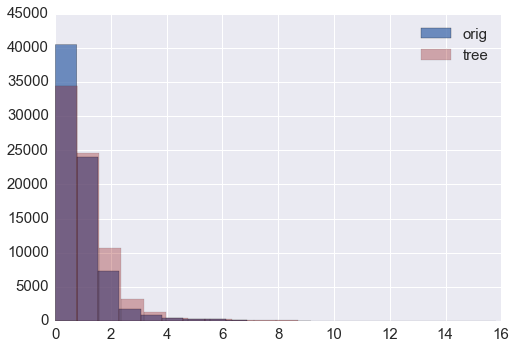

In [60]:
sns.set_style('darkgrid')
plt.hist(dist_orig, bins=12, alpha=0.8, label='orig');
plt.hist(dist_tree, bins=20, alpha=0.3, color='darkred', label='tree');
plt.legend()

In [64]:
simple_v, simple_f, _ = read_vtk('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/lowres_lh_d_def.vtk')

In [65]:
complex_v, complex_f, _ = read_vtk('/scr/ilz3/myelinconnect/struct/surf_lh/orig/mid_surface/BP4T_lh_mid.vtk')

In [70]:
np.where(np.isnan(simple_norms))

(array([23213, 23213, 23213]), array([0, 1, 2]))

In [71]:
np.where(np.isnan(complex_norms))

(array([], dtype=int64), array([], dtype=int64))

In [72]:
simple_v[23213]

array([  81.60001,  208.3999 ,  169.19989])

In [ ]:
def calculate_normals(vertices, faces):
    
    triangles = vertices[faces]
    face_normals = np.cross( triangles[::,1 ] - triangles[::,0]  , triangles[::,2 ] - triangles[::,0] )
    #face_normals /= np.linalg.norm(face_normals, axis=1)[:,np.newaxis]
    face_normals /= 2 # weighting by surface area of the triangle, which is half the length of the normal
    
    vertex_normals = np.zeros(vertices.shape, dtype=vertices.dtype )
    vertex_normals[faces[:,0]] += face_normals
    vertex_normals[faces[:,1]] += face_normals
    vertex_normals[faces[:,2]] += face_normals
    vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:,np.newaxis]
    
    return vertex_normals

In [79]:
test_tri=simple_v[simple_f[np.where(simple_f==23213)[0]]]

In [106]:
test_f=simple_f[np.where(simple_f==23213)[0]]

In [107]:
test_f

array([[23214, 23213, 23680],
       [23680, 23213, 22797],
       [23213, 22796, 22797],
       [23213, 23214, 23684],
       [22796, 23213, 23684]])

In [171]:
test_vnorms=np.zeros((np.unique(test_f).shape[0],3))

In [143]:
test_f[:,0]

array([23214, 23680, 23213, 23213, 22796])

In [144]:
np.unique(test_f)

array([22796, 22797, 23213, 23214, 23680, 23684])

In [145]:
test_idx = np.asarray([3,4,2,2,0])

In [172]:
test_vnorms

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [167]:
test_fnorm[2] *=5

In [173]:
test_fnorm[1:3]

array([[  1.,   1.,   1.],
       [ 10.,  10.,  10.]])

In [174]:
test_vnorms[np.asarray([2,2])]+=test_fnorm[1:3]

In [175]:
test_vnorms

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [ 10.,  10.,  10.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])

In [134]:
test_norm.shape

(5, 3)

In [110]:
test_f

array([[23214, 23213, 23680],
       [23680, 23213, 22797],
       [23213, 22796, 22797],
       [23213, 23214, 23684],
       [22796, 23213, 23684]])

In [81]:
test_norm = np.cross( test_tri[::,1 ] - test_tri[::,0]  , test_tri[::,2 ] - test_tri[::,0] )

In [105]:
np.sum(test_norm, axis=0)/np.linalg.norm(np.sum(test_norm, axis=0))

array([ 0.69870539,  0.55290932, -0.45398465])

In [89]:
simple_f[np.where(simple_f==23213)[0]]

array([[23214, 23213, 23680],
       [23680, 23213, 22797],
       [23213, 22796, 22797],
       [23213, 23214, 23684],
       [22796, 23213, 23684]])

In [90]:
simple_v[23214]

array([  81.60001,  208.3999 ,  169.19989])

In [91]:
simple_v[23213]

array([  81.60001,  208.3999 ,  169.19989])

In [93]:
simple_v[23684]

array([  81.60001,  208.3999 ,  169.19989])

In [95]:
np.linalg.norm(test_norm, axis=1)[:,np.newaxis]

array([[  0.00000000e+00],
       [  2.40581297e-06],
       [  4.26274970e-05],
       [  0.00000000e+00],
       [  0.00000000e+00]])

In [97]:
np.dot([1,2,3],[0,0,0])

0

In [98]:
np.arccos(0)

1.5707963267948966